# Introduction to `pytorch`

## Lecture plan

- Introduction to [`pytorch`](https://pytorch.org/tutorials/beginner/basics/intro.html).
   - Working with **tensors**.
- Building a simple network.
   - A simple classification problem using `torch`.

## Introduction to `pytorch`

- There are a *bunch* of Python packages for using neural networks.
    - `torch`, `keras`, `tensorflow`, and more!
- Plus other packages, like `transformers`, to use specific kinds of networks (e.g., **large language models**).
- In our introduction, we'll use `pytorch`.
- To follow along in DataHub, you'll need to use the *Machine Learning* container.

### About `pytorch`

> `pytorch` is a Python library originally developed by Facebook's AI Research (FAIR) lab).

- It provides a flexible *interface* for constructing and training neural networks.
- To understand `torch`, we'll start out by introducing `tensors`.

In [1]:
import torch
import torch.nn as nn

### Introduction to `tensors`

> A **tensor** is a specialized data structure, similar to arrays or matrices.

- In `torch`, `tensors` are used to encode the *parameters* of a model, as well as the inputs and outputs.
- Very similar to `np.array`, except they can run on GPUs——more efficient!

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
### Compare to numpy
import numpy as np
x_data_np = np.array(data)
x_data_np

array([[1, 2],
       [3, 4]])

In [4]:
### Converting from numpy
torch.from_numpy(x_data_np)

tensor([[1, 2],
        [3, 4]])

#### Basic attributes

- Like a `np.array`, `tensors` have some key attributes like `shape`.
- Tensors can also be located on `cpu` or another `device`.

In [5]:
### Create random tensor
random_tensor = torch.rand(3,4)
### Shape
random_tensor.shape

torch.Size([3, 4])

In [6]:
### Type of tensor
random_tensor.dtype

torch.float32

In [7]:
### Device
random_tensor.device

device(type='cpu')

#### Working with `tensors`

- Like a `np.array`, we can *index* into `tensors` using the `tensor_name[index]` operation.
- We can also **concatenate** and **stack** these tensors.
    - **Concatenating**: combine along a given dimension.
    - **Stacking**: combine along a new dimension.

In [8]:
### Indexing
random_tensor[0]

tensor([0.7707, 0.7687, 0.4573, 0.1604])

In [9]:
### Concatenating
t1 = torch.cat([random_tensor, random_tensor], dim=0)
print(t1)

tensor([[0.7707, 0.7687, 0.4573, 0.1604],
        [0.5161, 0.2342, 0.3509, 0.6406],
        [0.8688, 0.2181, 0.5134, 0.2026],
        [0.7707, 0.7687, 0.4573, 0.1604],
        [0.5161, 0.2342, 0.3509, 0.6406],
        [0.8688, 0.2181, 0.5134, 0.2026]])


In [10]:
### Concatenating
t1 = torch.stack([random_tensor, random_tensor], dim=0)
print(t1)

tensor([[[0.7707, 0.7687, 0.4573, 0.1604],
         [0.5161, 0.2342, 0.3509, 0.6406],
         [0.8688, 0.2181, 0.5134, 0.2026]],

        [[0.7707, 0.7687, 0.4573, 0.1604],
         [0.5161, 0.2342, 0.3509, 0.6406],
         [0.8688, 0.2181, 0.5134, 0.2026]]])


#### Math with `tensors`

- Like a `np.array`, we can apply *arithmetic operations* to our `tensor` objects.


In [11]:
a = torch.tensor([[1, 2], [3, 4]])
a

tensor([[1, 2],
        [3, 4]])

In [12]:
### Element wise product
a * a

tensor([[ 1,  4],
        [ 9, 16]])

In [13]:
### Element wise sum
a + a

tensor([[2, 4],
        [6, 8]])

In [14]:
### Sum each column
a.sum(dim = 0)

tensor([4, 6])

In [15]:
### Sum each row
a.sum(dim = 1)

tensor([3, 7])

### Using `torch` `Datasets`

- `pytorch` also has a custom `Dataset` class that can be used to represent the data to train neural networks.

In [16]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#### The `FashionMNIST` Dataset

- The `FashionMNIST` dataset contains images of *parts of clothing* (e.g., a shirt, socks, etc.) along with their labels.
- Intended as a replacement for classic [MNIST](https://en.wikipedia.org/wiki/MNIST_database), a handwritten digit classification task.

In [17]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

#### Working with the `FashionMNIST` dataset

- There are 60K trianing observations.
- Each observation is a `(28, 28)` `tensor` array of *pixels*, along with a *label*.

In [18]:
### Size of data
len(training_data)

60000

In [19]:
### Map label onto actual clothing type
labels_map = {
    0: "T-Shirt", 1: "Trouser",
    2: "Pullover", 3: "Dress",
    4: "Coat", 5: "Sandal",
    6: "Shirt", 7: "Sneaker",
    8: "Bag", 9: "Ankle Boot",
}

In [20]:
img, label = training_data[2]
print(img.shape)
print(labels_map[label])

torch.Size([1, 28, 28])
T-Shirt


#### Working with the `FashionMNIST` dataset

We can also *visualize* examples from some of the classes.

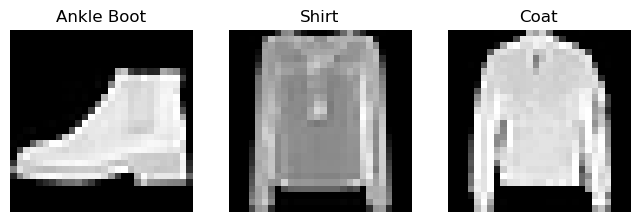

In [21]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Batching and the `DataLoader`

> A **batch** is a small, manageable chunk of your dataset.

- Training neural networks is typically done in **non-overlapping batches**.
    - Tends to improve efficiency.
    - Allows the model to learn from different *samples* of data, which improves generalization.
- The `DataLoader` object helps us deal with processing and sampling the data in these batches.

In [22]:
from torch.utils.data import DataLoader

#### A `DataLoader` wrapper

- Here, we set `batch_size = 64`.
- That means that for any given **forward** and **backward** pass through network, we are processing `64` training samples.

In [23]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [24]:
for X, y in test_dataloader:
    print(f"Shape of X: [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

Shape of X: [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


### Interim summary

- `pytorch` contains various classes and operations to handle your *data*.
- `tensors` are analogous to `numpy` arrays.
   - All data and model parameters are represented as `tensors`.
- `pytorch` also contains classes to help with **training**.
   - `Dataset`.
   - `DataLoader`
 
> But how do we actually build the **neural networks**?

## Building our first *neural network*

In this section, we'll build a simple **neural network** object in `pytorch`, and train it on a classification task.

### Creating the class

- The `NeuralNetwork` class is a subclass of the `nn.Module` class.
- Any network built in `torch` should be a *subclass* of `nn.Module`.

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

#### Understanding our class (1)

```python
    def __init__(self):
        
        ### Inherits nn.Module properties
        super().__init__()
        
        ### Flattens input tensor
        self.flatten = nn.Flatten()

        ### Creates actual neural network structure!
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), ### First layer
            nn.ReLU(), ### ctivation function
            nn.Linear(512, 512), ### another hidden layer
            nn.ReLU(), ### anotehr activation function
            nn.Linear(512, 10), ### final layer = output 
        )
```

#### Check-in

Try to explain the dimensionality of the following model properties:

- `nn.Linear(28*28, 512)`
- `nn.Linear(512, 512)`
- `nn.Linear(512, 10)`

In [26]:
### Your answer here

#### Understanding model dimensionality

- `nn.Linear(28*28, 512)`: input is `28x28` pixel arrays; maps to `512` hidden units
- `nn.Linear(512, 512)`: hidden layer has `512` inputsn and `512` outputs.
- `nn.Linear(512, 10)`: another layer with `512` inputs but `10` outputs, for the `10` output classes.

In [27]:
len(training_data.classes)

10

#### Understanding our class (2)

> The `forward` function defines how to run the model "forward" on some input.

- First, `flatten` the input array.
- Then, run the input through our `linear_relu_stack` we defined in `__init__`.

```python
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
```

#### Instantiating the class

- We can create an *instance* of the `NeuralNetwork` class, and `print` its structure.

In [28]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#### Running the model

- We can run the model **forward** by feeding it random pixels.
- This yields `logits`, i.e., real values assigned to different output classes.
- We can apply the **softmax** function to turn `logits` into a probability distribution.

In [29]:
### Random input array
X = torch.rand(1, 28, 28)
### Run model forward
logits = model(X)
logits

tensor([[-0.0746, -0.0445, -0.0618,  0.0547, -0.0448, -0.0170,  0.0274, -0.0158,
         -0.0981, -0.0253]], grad_fn=<AddmmBackward0>)

In [30]:
### Softmax
pred_probab = nn.Softmax(dim=1)(logits)
### What did we predict?
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3])


#### What are our *parameters*?

> The **parameters**, or **weights**, determine how representations are changed across layers.

- Initially, these are **randomly sampled** from a uniform distribution.
- These are what we want to *change*, ultimately!

In [31]:
params = list(model.named_parameters())
### First parameter name
print(params[0][0])
### Parameter size
print(params[0][1].size())

linear_relu_stack.0.weight
torch.Size([512, 784])


#### Understanding `nn.Linear`

- To get a better understanding of how this works, we can create an arbitrary `nn.Linear` layer.

In [32]:
### New layer
linear_layer = nn.Linear(10, 10)
print(linear_layer.weight.shape)
print(linear_layer.bias.shape)

torch.Size([10, 10])
torch.Size([10])


### Let's train the model!

- Above, we just built the **architecture** of our model.
- To *train it*, we need to:
    - Define our **hyper-parameters**.
    - Define a **loss function**.
    - Decide on an **optimizer**.
    - Give our neural network some **training data**.

#### Setting up our hyperparameters

> A **hyper-parameter** is an adjustable parameter controlling the training process; your choice of hyperparameter can have a big impact on model performance.

- **Number of Epochs**: the number times to iterate over the dataset. 
- **Batch Size**: the number of data samples propagated through the network before the parameters are updated. 
- **Learning Rate**: how much to update models parameters at each batch/epoch.
    - Smaller values result in slower learning speed.
    - Larger values can result in unpredictable behavior. 

In [33]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### The optimization "loop"

> An **epoch** is a single cycle of this optimization loop.

- Once we've decided our hyper-parameters, we *train* and *optimize* with an **optimization loop**.
- During *training*, we update our parameters to reduce error.
- During *validation/testing*, we iterate over our test data to see if performance is improving.  

#### A loss function

> A **loss function** defines how to *penalize* the model when it gets its predictions wrong.

- We will use the **cross-entropy loss**, which is common for neural networks.

$$ L(p,y)= -\sum_{i=1}^Cy_ilog(p_i)$$

- Technically, since $y$ is just a **one-hot encoding**, this simplifies considerably to:

$$L(p,y)=−log(p_k)$$

- Where $k$ is the label for the true class.
- This simplified version is the same as **surprisal**, the "information value" of an event.
    - We want a model that *minimizes surprisal* of the *true class*.

In [34]:
### Defining loss in pytorch
loss_fn = nn.CrossEntropyLoss()

#### An optimizer

> An **optimizer** determines the algorithm for updating weights.

- There are [many different optimizers](https://pytorch.org/docs/stable/optim.html) available in `torch`.
- A common approach is **stochastic gradient descent (SGD)**.
- In SGD, you use a **random subset** of your data to update your model parameters each time.

In [35]:
### Setting up optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Our `train_loop`

Here, we define a function (straight from `torch`) to train our model.

In [36]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

#### Our `test_loop`

Here, we define a function (straight from `torch`) to test our model.

In [37]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#### Let's train it!

Here, we train for only two `epochs`. Training on more `epochs` would improve performance!

In [ ]:
epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296429  [   64/60000]
loss: 2.287414  [ 6464/60000]
loss: 2.269481  [12864/60000]
loss: 2.268060  [19264/60000]
loss: 2.253296  [25664/60000]


### Inspecting our *fit* model

- Now, we have a model with **fit parameters**.
- We can *inspect* these parameters using the `model.state_dict()` function.
- You can also [`save` these parameters to disk](https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html), should you choose.

In [39]:
params = model.state_dict()
### Parameters
params.keys()

odict_keys(['linear_relu_stack.0.weight', 'linear_relu_stack.0.bias', 'linear_relu_stack.2.weight', 'linear_relu_stack.2.bias', 'linear_relu_stack.4.weight', 'linear_relu_stack.4.bias'])

## Lecture wrap-up

- `pytorch` is a widely-used library for **building** and **training** neural networks.
- It relies on the `tensor` object, which is like a `np.array`.
- Building a neural network involves some other processes, including:
    - Setting up your data in a `DataLoader`.
    - Defining your model **architecture** in a new class (that inherits from `nn.Module`).
    - Setting up your **hyper-parameters**, **loss function**, and **optimizer**.
    - Training the model!
- Once trained, a model can be applied to new data.